# Dataset and Motivation

For this notebook we will be working with the Our World in Data COVID-19 Dataset. The data contains information about vaccinations, tests & positivity rates, hospitalization & ICU numbers, confirmed cases, confirmed deaths, and more in relation to the COVID-19 pandemic from around the world. The data is compiled from a number of sources, including the Ceter for Systems Science and Engineering at John Hopkins University, European Centre for Disease Prevention and Control, various governmental sources, official reports, and more. A full description of the data sources included in this dataset can be found at the official [Github Repository](https://github.com/owid/covid-19-data/tree/master/public/data/) for the dataset. While some variables are updated daily, others are updated weekly or periodically depending on the availability of data from the official sources.

## Packages

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
size = covid_data.shape
print("The dataset includes " + str(size[0]) + " observations of " + str(size[1]) + " features.")

The dataset includes 132872 observations of 65 features.


In [4]:
print("The features included in the dataset are: " + str(list(covid_data.columns)))

The features included in the dataset are: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'peo

# Research Question

How has COVID-19 spread since the first case was discovered? How has the trend changed since the introduction of key intervention measures such as social distancing, mask requirements, vaccinations, and more?

# Data Cleaning

In [5]:
covid_data.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
33998,DOM,North America,Dominican Republic,2021-07-08,331826.0,885.0,804.714,3870.0,0.0,4.286,...,8.5,19.1,55.182,1.60,74.08,0.756,NaN,NaN,NaN,NaN
27706,CRI,North America,Costa Rica,2021-11-05,562316.0,487.0,374.000,7134.0,10.0,15.000,...,6.4,17.4,83.841,1.13,80.28,0.810,NaN,NaN,NaN,NaN
53848,ISL,Europe,Iceland,2020-04-11,1689.0,14.0,38.857,8.0,1.0,0.571,...,14.3,15.2,NaN,2.91,82.99,0.949,NaN,NaN,NaN,NaN
121773,TUR,Asia,Turkey,2020-09-06,279806.0,1578.0,1608.571,6673.0,53.0,49.571,...,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
35993,GNQ,Africa,Equatorial Guinea,2020-03-18,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,24.640,2.10,58.74,0.592,NaN,NaN,NaN,NaN


We will narrow our dataset to only focus on US data.

In [6]:
us_data = covid_data[covid_data['iso_code'] == 'USA'].reset_index()

In [7]:
us_data.shape

(661, 66)

We can drop some columns that are not relevant to our analysis.

In [8]:
us_data.drop(columns=['index', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'iso_code', 'continent', 'location', 'gdp_per_capita', 'extreme_poverty'], inplace=True)

Lets check the values of the remaining columns to verify whether there is any other data cleaning for us to do.

In [21]:
stats = us_data.describe()
stats

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.610000e+02,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,616.000000,661.000000,...,6.610000e+02,661.000,6.610000e+02,6.610000e+02,6.610000e+02,6.610000e+02,6.610000e+02,661.00,661.00,661.000
mean,1.897341e+07,71091.229955,351638.036309,1153.585477,56991.740227,213.541641,1056.239443,3.465100,1.120308,10376.366112,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926
std,1.571596e+07,66282.611373,245344.041883,967.411861,47207.104701,199.097687,736.956865,2.905892,0.474015,8817.790995,...,7.110808e-15,0.000,1.777702e-15,5.688647e-14,1.777702e-15,3.555404e-15,3.555404e-15,0.00,0.00,0.000
min,1.000000e+00,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,0.710000,0.000000,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926
25%,2.902920e+06,25066.000000,130103.000000,440.000000,8719.701000,75.292000,390.799000,1.322000,0.910000,0.000000,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926
50%,1.737060e+07,49000.000000,315284.000000,919.000000,52177.262000,147.185000,947.040000,2.760000,1.010000,9231.000000,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926
75%,3.333642e+07,94431.000000,593694.000000,1648.000000,100134.895000,283.649000,1783.320000,4.950000,1.140000,16238.000000,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926
max,4.699130e+07,303186.000000,762520.000000,4442.000000,141151.025000,910.701000,2290.434000,13.343000,3.650000,28891.000000,...,3.830000e+01,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.77,78.86,0.926


In [38]:
range0 = stats.apply(lambda x: x['min'] == x['max'])
range0[range0 == True]

weekly_icu_admissions                True
weekly_icu_admissions_per_million    True
population                           True
population_density                   True
median_age                           True
aged_65_older                        True
aged_70_older                        True
cardiovasc_death_rate                True
diabetes_prevalence                  True
female_smokers                       True
male_smokers                         True
hospital_beds_per_thousand           True
life_expectancy                      True
human_development_index              True
dtype: bool

We see that some variables/features in the data contain only one value across all observations. For most of these features, this makes them unusable for our analysis, so we will drop some more columns.

In [47]:
drop_cols = list(range0[range0 == True].index)
drop_cols.remove('hospital_beds_per_thousand')
us_data.drop(columns=drop_cols,inplace=True)

In [48]:
us_data.shape

(661, 34)

We are left with 660 observations of 34 features.

In [49]:
print("The remaining variables available to us to examine are: " + str(list(us_data.columns)))

The remaining variables available to us to examine are: ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'stringency_index', 'hospital_beds_per_thousand']


In [50]:
us_data.dtypes

date                                   datetime64[ns]
total_cases                                   float64
new_cases                                     float64
total_deaths                                  float64
new_deaths                                    float64
total_cases_per_million                       float64
new_cases_per_million                         float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million                      float64
hosp_patients                                 float64
hosp_patients_per_million                     float64
weekly_hosp_admissions                        float64
weekly_hosp_admissions_per_million            float64
new_tests                                     float64
total_tests                                   float64
total_tests_per_thousand    

We see that the date column is incorrectly typed -- we must correct this.

In [51]:
us_data['date'] = pd.to_datetime(us_data['date'], utc=False)

In [52]:
us_data.dtypes

date                                   datetime64[ns]
total_cases                                   float64
new_cases                                     float64
total_deaths                                  float64
new_deaths                                    float64
total_cases_per_million                       float64
new_cases_per_million                         float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million                      float64
hosp_patients                                 float64
hosp_patients_per_million                     float64
weekly_hosp_admissions                        float64
weekly_hosp_admissions_per_million            float64
new_tests                                     float64
total_tests                                   float64
total_tests_per_thousand    

The date column is now properly typed.

In [53]:
us_data.isna().sum()

date                                    0
total_cases                             0
new_cases                               0
total_deaths                            0
new_deaths                              0
total_cases_per_million                 0
new_cases_per_million                   0
total_deaths_per_million                0
new_deaths_per_million                  0
reproduction_rate                      45
icu_patients                            0
icu_patients_per_million                0
hosp_patients                           0
hosp_patients_per_million               0
weekly_hosp_admissions                  0
weekly_hosp_admissions_per_million      0
new_tests                               0
total_tests                             0
total_tests_per_thousand                0
new_tests_per_thousand                  0
positive_rate                           0
tests_per_case                          0
tests_units                             0
total_vaccinations                

The handwashing facilities column seems to only contain nulls, so we will drop it.

In [54]:
us_data.drop(columns=['handwashing_facilities'], inplace=True)

KeyError: "['handwashing_facilities'] not found in axis"

In [55]:
us_data[pd.isna(us_data['reproduction_rate'])]

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,hospital_beds_per_thousand
0,2020-01-22,1.0,0.0,0.0,0.0,0.003,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
1,2020-01-23,1.0,0.0,0.0,0.0,0.003,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
2,2020-01-24,2.0,1.0,0.0,0.0,0.006,0.003,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
3,2020-01-25,2.0,0.0,0.0,0.0,0.006,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
4,2020-01-26,5.0,3.0,0.0,0.0,0.015,0.009,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
5,2020-01-27,5.0,0.0,0.0,0.0,0.015,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
6,2020-01-28,5.0,0.0,0.0,0.0,0.015,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
7,2020-01-29,6.0,1.0,0.0,0.0,0.018,0.003,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
8,2020-01-30,6.0,0.0,0.0,0.0,0.018,0.000,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77
9,2020-01-31,8.0,2.0,0.0,0.0,0.024,0.006,0.000,0.000,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.77


We can replace most of the null values with 0s with the exception of the reproduction_rate column. For the rest of the columns, the nulls appear in locations where no data was available for that particular metric, which in this case implies a zero. However, for the reproduction_rate, it is more complicated and indicates that we did not have enough data to calculate the correct rate. We will leave these nulls in our data.

In [56]:
cols = list(us_data.columns)
cols.remove('reproduction_rate')
us_data[cols] = us_data[cols].fillna(0)
us_data.isna().sum()

date                                    0
total_cases                             0
new_cases                               0
total_deaths                            0
new_deaths                              0
total_cases_per_million                 0
new_cases_per_million                   0
total_deaths_per_million                0
new_deaths_per_million                  0
reproduction_rate                      45
icu_patients                            0
icu_patients_per_million                0
hosp_patients                           0
hosp_patients_per_million               0
weekly_hosp_admissions                  0
weekly_hosp_admissions_per_million      0
new_tests                               0
total_tests                             0
total_tests_per_thousand                0
new_tests_per_thousand                  0
positive_rate                           0
tests_per_case                          0
tests_units                             0
total_vaccinations                

reproduction_rate is now the only column with nulls contained.

## Feature Engineering

Since we are interested in looking at the changes in trends given the implementation of various intervention measures, we will add indicator columns to understand which measures were in place for each observation. Specifically, we will look at when social distancing measures were implemented, stay at home orders were issued, mask mandates were announced, and vaccinations became available.

- According to the [Kaiser Family Foundation](https://www.kff.org/policy-watch/stay-at-home-orders-to-fight-covid19/), the first stay at home order was announced in  King County in Washington state on March 4, 2020
- According to [NPR](https://www.npr.org/2020/03/16/816658125/white-house-announces-new-social-distancing-guidelines-around-coronavirus), the White House announced social distancing guidelines on March 16, 2020.
- According to [Wikipedia](https://en.wikipedia.org/wiki/Face_masks_during_the_COVID-19_pandemic_in_the_United_States#Timeline), the CDC issued the first federal guidance recommending non-medical face coverings to be worn on April 3, 2020.
- According to the [FDA](<https://www.fda.gov/emergency-preparedness-and-response/coronavirus-disease-2019-covid-19/covid-19-frequently-asked-questions#:~:text=On%20December%2011%2C%202020,)%20of%20a%20vaccine.>), the first Emergency Use Authorization for a COVID vaccine was granted on December 11, 2020 for the Pfizer-BioNTech Vaccine.

In [57]:
us_data['stay_at_home'] = us_data['date'] > '2020-03-04'
us_data['social_distancing'] = us_data['date'] > '2020-03-16'
us_data['face_covering'] = us_data['date'] > '2020-04-04'
us_data['vaccines'] = us_data['date'] > '2020-12-11'

In [58]:
us_data.sample(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,hospital_beds_per_thousand,stay_at_home,social_distancing,face_covering,vaccines
596,2021-09-09,40754775.0,159877.0,657093.0,3284.0,122417.932,480.234,1973.756,9.864,1.03,...,113.83,62.39,53.35,0.63,52.31,2.77,True,True,True,True
540,2021-07-15,34052349.0,29793.0,608003.0,326.0,102285.392,89.491,1826.301,0.979,1.51,...,102.10,55.75,48.60,0.00,49.54,2.77,True,True,True,True
564,2021-08-08,35858731.0,26605.0,616662.0,114.0,107711.347,79.915,1852.310,0.342,1.33,...,106.37,58.61,50.13,0.00,49.54,2.77,True,True,True,True
109,2020-05-10,1339265.0,19050.0,83059.0,1001.0,4022.843,57.222,249.490,3.007,0.91,...,0.00,0.00,0.00,0.00,72.69,2.77,True,True,True,False
612,2021-09-25,42922729.0,46982.0,688693.0,751.0,128929.965,141.123,2068.675,2.256,0.90,...,117.05,63.69,54.91,1.05,56.02,2.77,True,True,True,True


In [59]:
def determine_measures(row):
    measures = ''
    for col in ['stay_at_home', 'social_distancing', 'face_covering', 'vaccines']:
        if row[col]:
            measures = measures + col + " | "

    return measures[:-3]

In [60]:
us_data['prevention_measures'] = us_data.apply(determine_measures, axis=1)

In [61]:
us_data[['stay_at_home', 'social_distancing', 'face_covering', 'vaccines', 'prevention_measures']].sample(10)

,stay_at_home,social_distancing,face_covering,vaccines,prevention_measures
443,True,True,True,True,stay_at_home | social_distancing | face_coveri...
175,True,True,True,False,stay_at_home | social_distancing | face_covering
368,True,True,True,True,stay_at_home | social_distancing | face_coveri...
512,True,True,True,True,stay_at_home | social_distancing | face_coveri...
423,True,True,True,True,stay_at_home | social_distancing | face_coveri...
66,True,True,False,False,stay_at_home | social_distancing
644,True,True,True,True,stay_at_home | social_distancing | face_coveri...
521,True,True,True,True,stay_at_home | social_distancing | face_coveri...
648,True,True,True,True,stay_at_home | social_distancing | face_coveri...
544,True,True,True,True,stay_at_home | social_distancing | face_coveri...


# Visualization

In [62]:
us_data.dtypes

date                                   datetime64[ns]
total_cases                                   float64
new_cases                                     float64
total_deaths                                  float64
new_deaths                                    float64
total_cases_per_million                       float64
new_cases_per_million                         float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million                      float64
hosp_patients                                 float64
hosp_patients_per_million                     float64
weekly_hosp_admissions                        float64
weekly_hosp_admissions_per_million            float64
new_tests                                     float64
total_tests                                   float64
total_tests_per_thousand    

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US')

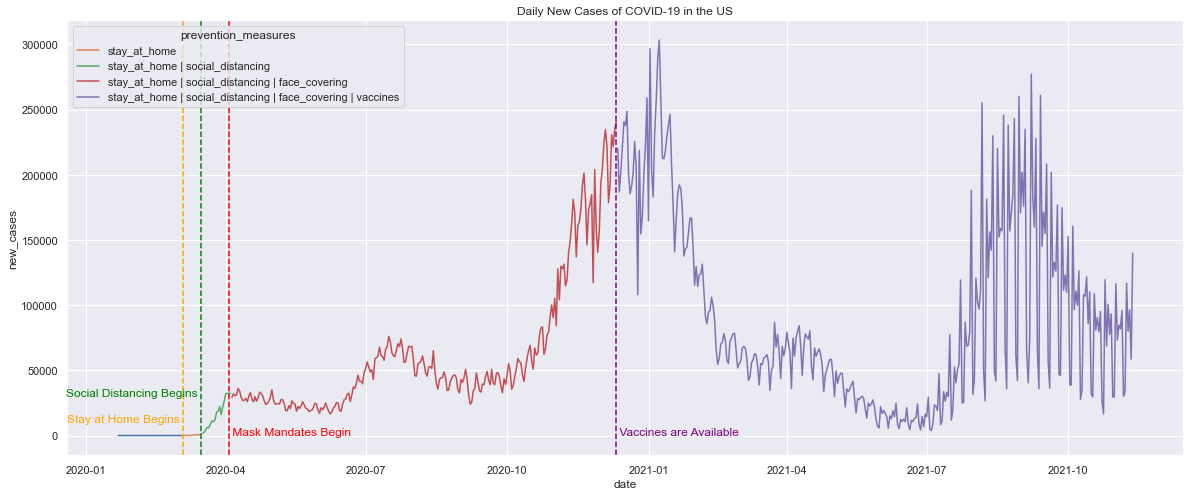

In [63]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='new_cases', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 10000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 30000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate(' Vaccines are Available', (pd.to_datetime('2020-12-11'), 0), color='purple')
plt.title("Daily New Cases of COVID-19 in the US")

Text(0.5, 1.0, 'Daily Deaths from COVID-19 in the US')

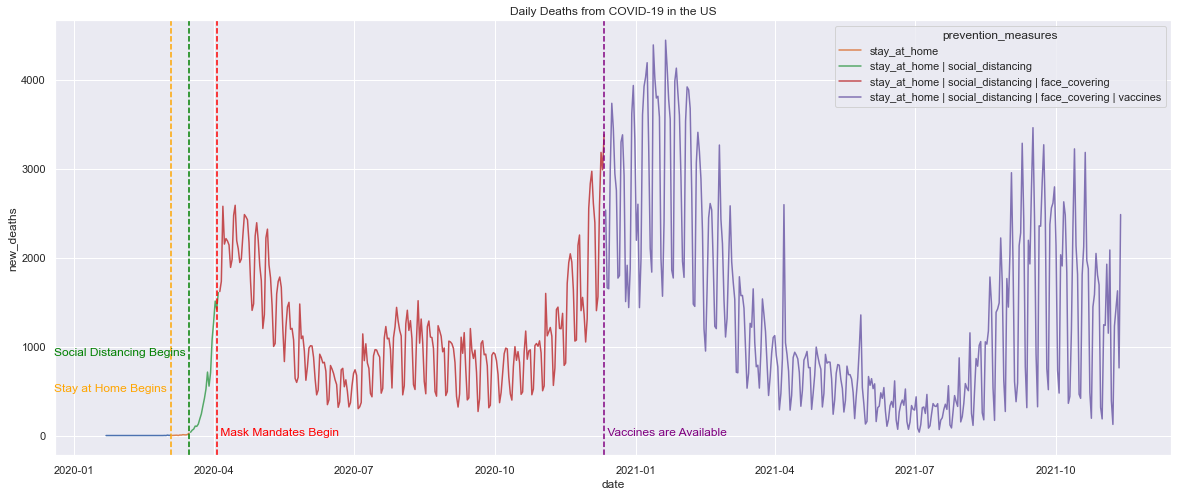

In [64]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='new_deaths', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 500), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 900), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate(' Vaccines are Available', (pd.to_datetime('2020-12-11'), 0), color='purple')
plt.title("Daily Deaths from COVID-19 in the US")

Text(0.5, 1.0, 'Daily COVID-19 ICU Patients in the US')

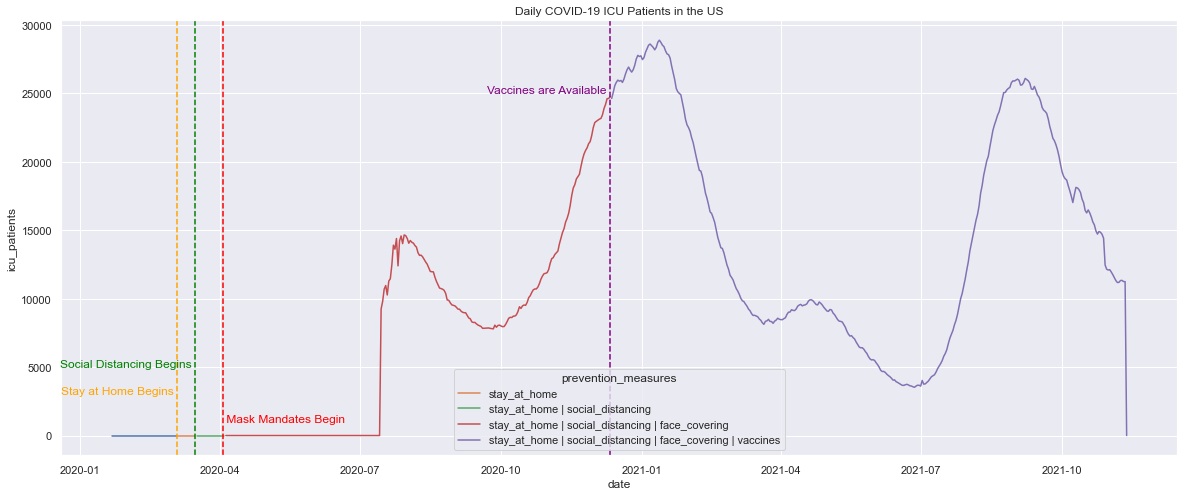

In [65]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='icu_patients', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 3000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 5000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 1000), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate('Vaccines are Available ', (pd.to_datetime('2020-12-11'), 25000), color='purple', ha='right')
plt.title("Daily COVID-19 ICU Patients in the US")

Text(0.5, 1.0, 'Daily COVID-19 Hospitalizations in the US')

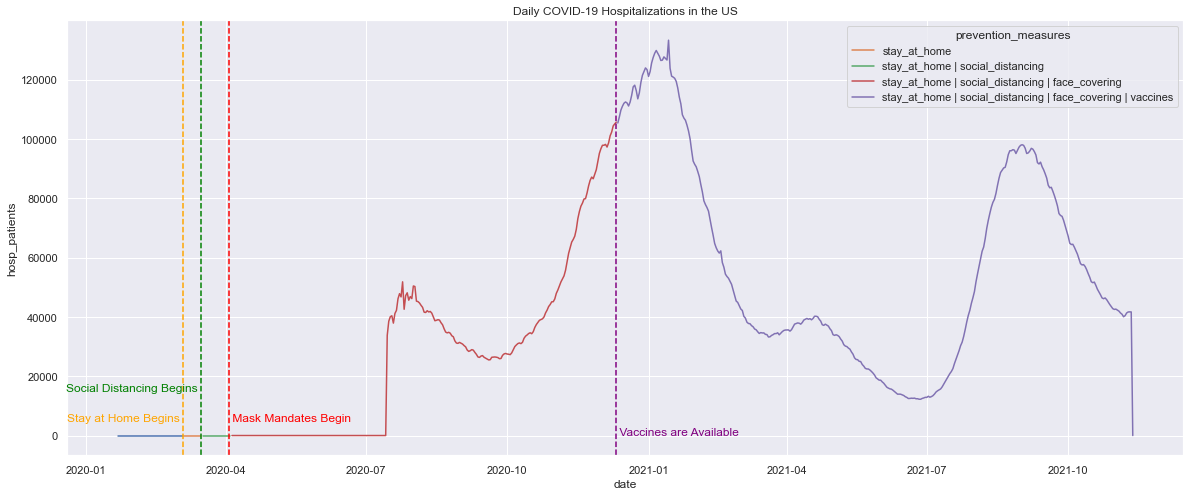

In [66]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='hosp_patients', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 5000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 15000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 5000), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate(' Vaccines are Available', (pd.to_datetime('2020-12-11'), 0), color='purple')
plt.title("Daily COVID-19 Hospitalizations in the US")

Text(0.5, 1.0, 'COVID-19 Reproduction Rate in the US')

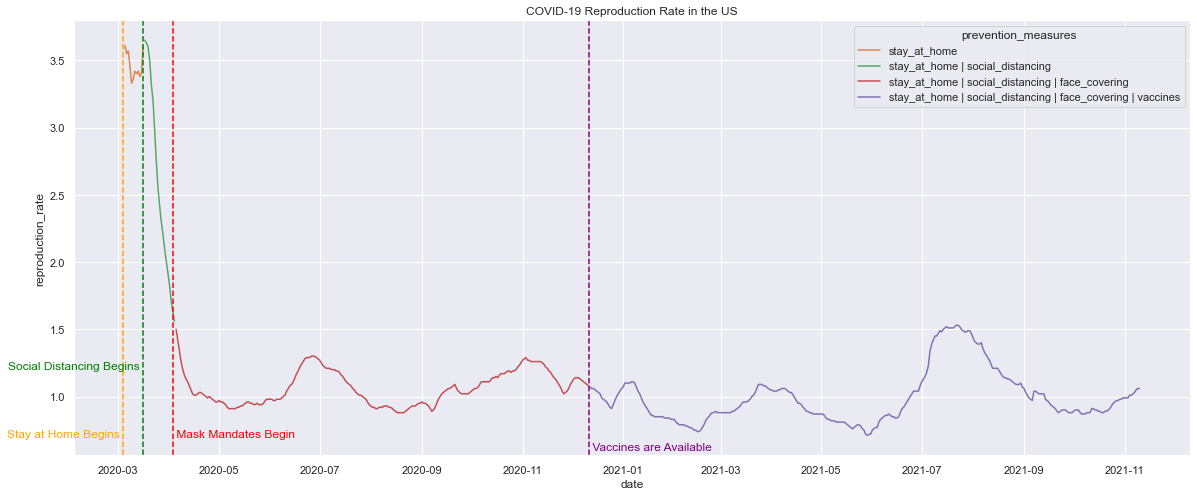

In [67]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='reproduction_rate', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 0.7), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 1.2), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0.7), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate(' Vaccines are Available', (pd.to_datetime('2020-12-11'), 0.6), color='purple')
plt.title("COVID-19 Reproduction Rate in the US")

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US vs Number of Fully Vaccinated People')

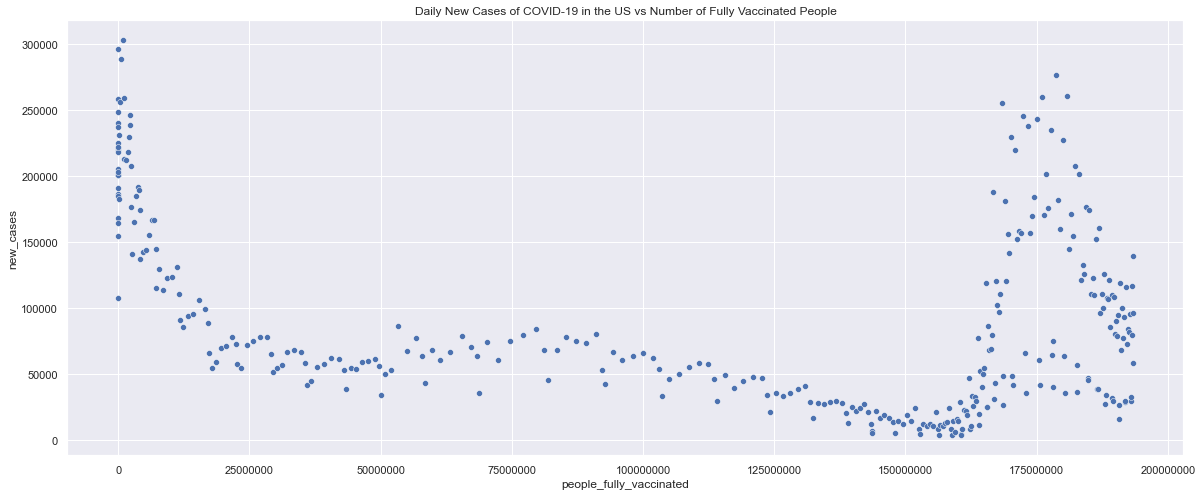

In [68]:
sns.scatterplot(x='people_fully_vaccinated', y='new_cases', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Number of Fully Vaccinated People")

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US vs Number of Vaccinated People (At least 1 shot)')

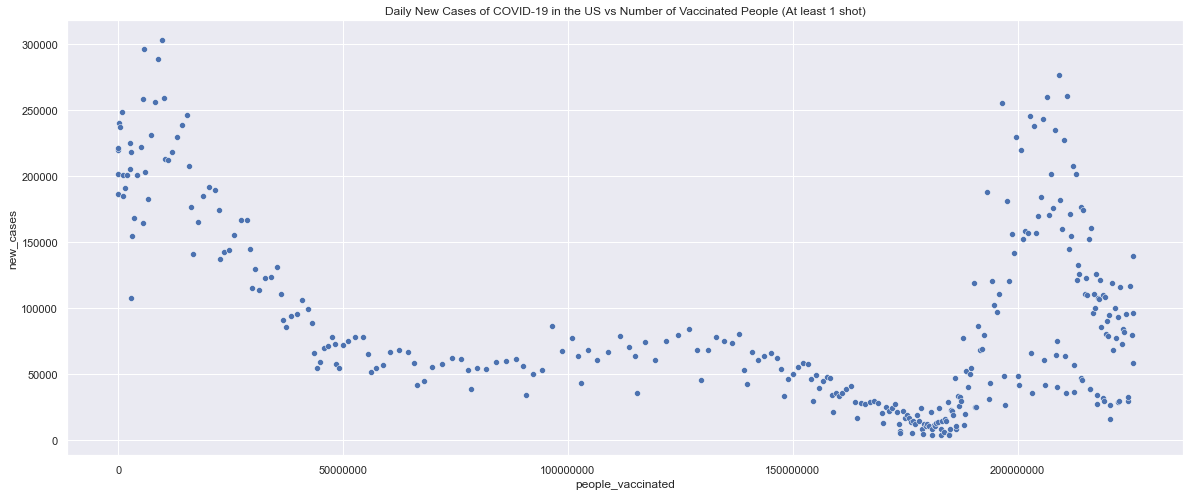

In [69]:
sns.scatterplot(x='people_vaccinated', y='new_cases', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Number of Vaccinated People (At least 1 shot)")

Text(0.5, 1.0, 'COVID-19 Test Positivity Rate in the US vs Number of Fully Vaccinated People')

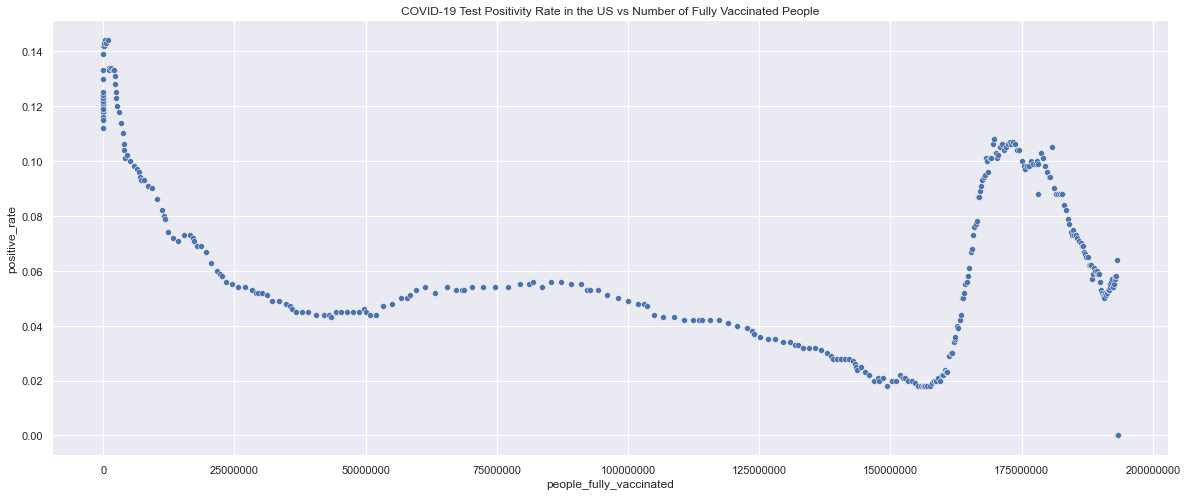

In [70]:
sns.scatterplot(x='people_fully_vaccinated', y='positive_rate', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("COVID-19 Test Positivity Rate in the US vs Number of Fully Vaccinated People")

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US vs Policy Stringency Index')

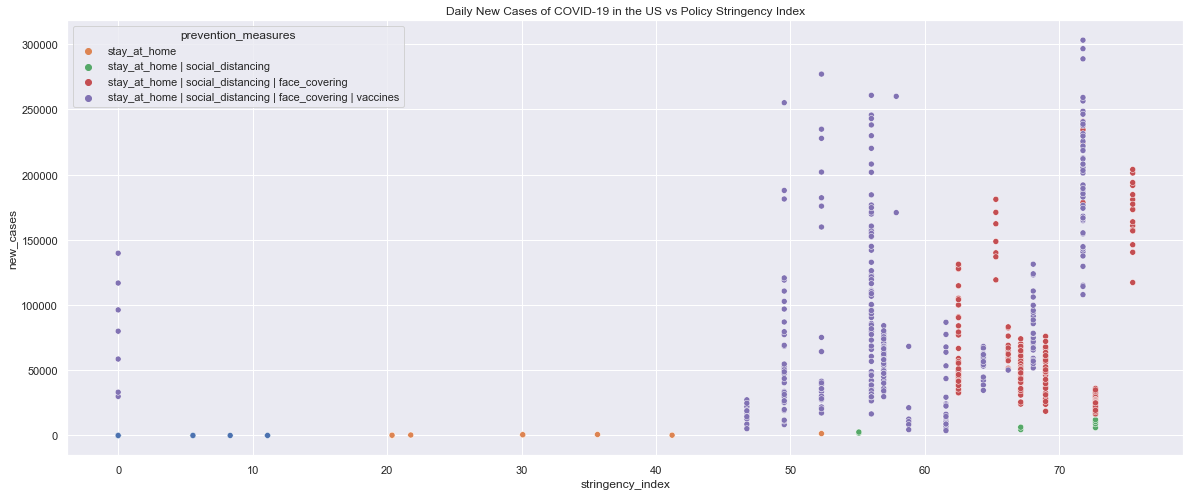

In [71]:
sns.scatterplot(x='stringency_index', y='new_cases', data=us_data, hue='prevention_measures')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Policy Stringency Index")

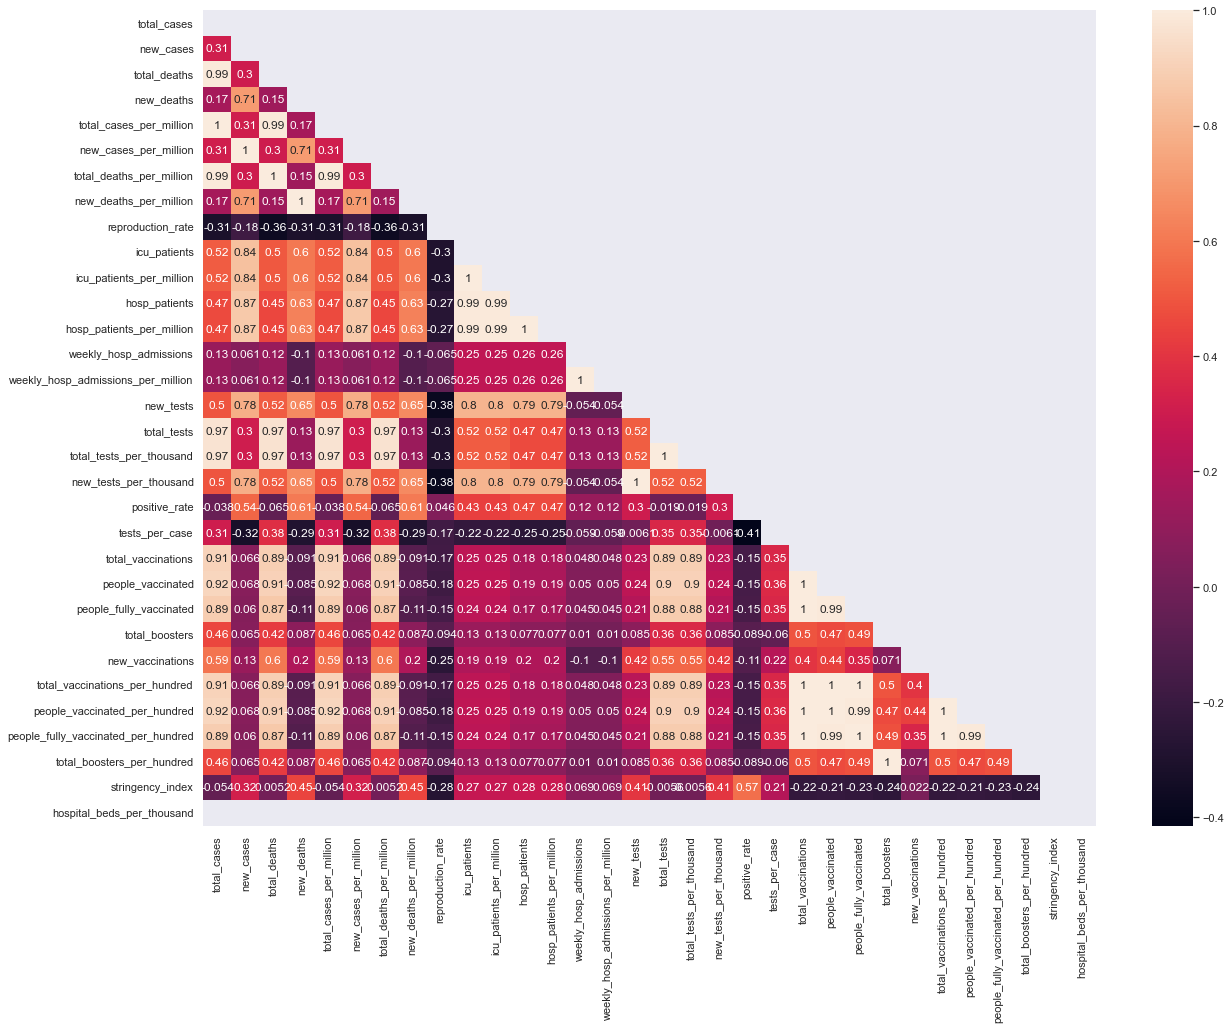

In [88]:
sns.set(rc={'figure.figsize':(20,15)})
corr = us_data.iloc[:,:-5].corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, mask=np.triu(corr))
# for t in ax.texts:
#     if abs(float(t.get_text()))>=0.5:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text